<a href="https://colab.research.google.com/github/pragmatic-philosopher09/Audio-Emotion-Analyzer-Through-Deep-Learning/blob/main/Phase_3_Building_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Core idea**
The key idea behind using CNNs for audio processing is that they are able to extract meaningful features from the raw audio signal by convolving the signal with a set of learned filters. These filters can be thought of as templates that are used to detect specific patterns or features in the audio signal.

# **EXISTING SYSTEM APPROACH**

1D CNN that operates directly on the raw audio signal. This approach has been used successfully for speech recognition tasks, where the CNN is trained to classify the audio signal into phoneme or word categories.

https://deepai.org/publication/1d-cnn-architectures-for-music-genre-classification

# **OUR APPROACH**

Our approach for using CNNs in audio processing is to represent the audio signal as a spectrogram, which is a visual representation of the frequency content of the signal over time. The spectrogram is then treated as an image, and a CNN is trained to classify it based on the features that it contains.



# **Importing the required Packages**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Defining the plotter function to visualize the accuracy and loss graphs**

In [2]:
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Features_data = pd.read_csv('/content/drive/MyDrive/features_dataset.csv')
#Features_data = pd.read_csv('features_dataset.csv')
Features_data.head()
# Features.shape
Features_data.shape

Mounted at /content/drive


(1440, 163)

*Using shuffling to make the data less prone to error. Shuffling the data can help to reduce any bias that might be introduced if the data is ordered in some way.*




In [4]:
from sklearn.utils import shuffle
temp_data = shuffle(Features_data)
# temp[:10]


In [5]:
len(temp_data)

1440

In [6]:
Features_data.shape

(1440, 163)

## **Splitting the data as 80-20 percent(Train and test data)**

In [7]:
df = np.random.rand(len(temp_data)) < 0.8
train_data = temp_data[df]
test_data = temp_data[~df]


In [8]:
train_features = train_data.iloc[:, :-1]
train_label = train_data.iloc[:, -1:]
test_features = test_data.iloc[:, :-1]
test_label = test_data.iloc[:, -1:]


## **LabelEncoder() is used to transform the string labels in y_train and y_test to numerical values. This is necessary because many machine learning algorithms cannot handle categorical data in their raw form.**

In [9]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(train_features)
y_train = np.array(train_label)
X_test = np.array(test_features)
y_test = np.array(test_label)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


# **Reshaping the values as three dimensional features with value set to 1 in axix=2**

In [10]:
x_train_cnn =np.expand_dims(X_train, axis=2)
x_test_cnn= np.expand_dims(X_test, axis=2)


In [11]:
x_train_cnn.shape

(1137, 162, 1)

In [12]:
x_test_cnn.shape

(303, 162, 1)

In [13]:
y_test.shape

(303, 8)

In [14]:
y_train.shape

(1137, 8)

In [15]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
x_train_cnn

array([[[1.05300000e+03],
        [1.52013708e-01],
        [5.57473063e-01],
        ...,
        [1.06045292e-04],
        [4.10674766e-05],
        [3.05110871e-06]],

       [[4.52000000e+02],
        [1.26953125e-01],
        [6.33651316e-01],
        ...,
        [4.50195330e-05],
        [1.88861013e-05],
        [8.11290590e-07]],

       [[1.34100000e+03],
        [3.43175817e-01],
        [7.11606681e-01],
        ...,
        [6.23067972e-05],
        [2.58292748e-05],
        [2.15614432e-06]],

       ...,

       [[1.28400000e+03],
        [2.11222331e-01],
        [5.67129791e-01],
        ...,
        [1.72621151e-03],
        [6.32183102e-04],
        [5.42277448e-05]],

       [[7.82000000e+02],
        [1.85411241e-01],
        [5.12791336e-01],
        ...,
        [1.29912471e-04],
        [4.60569536e-05],
        [4.79735581e-06]],

       [[5.02000000e+02],
        [1.36402271e-01],
        [7.07846880e-01],
        ...,
        [2.84728276e-06],
        [6.1104

### **Building the CNN layer**

In [17]:
import tensorflow as tf
import keras
from keras import models
from keras import layers, optimizers


In [18]:
#model = models.Sequential()
#model.add(tf.keras.layers.Conv1D(256, 5,padding='same', input_shape=(x_train_cnn.shape[1],1)))
#model.add(tf.keras.layers.Activation('relu'))

#model.add(tf.keras.layers.Conv1D(128, 5,padding='same'))
#model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))

#model.add(tf.keras.layers.Conv1D(128, 5,padding='same',))
#model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Dropout(0.1))

#model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
#model.add(tf.keras.layers.Activation('relu'))

#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(8))
#model.add(tf.keras.layers.Activation('softmax'))
#opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)


model = models.Sequential()

model.add(tf.keras.layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.0001)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 153, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 144, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 18, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 128)            163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [21]:
history=model.fit(x_train_cnn, y_train, batch_size=256, epochs=1000, validation_data=(x_test_cnn, y_test))


Epoch 1/1000
5/5 [==============================] - 12s 323ms/step - loss: 4.4162 - accuracy: 0.1187 - val_loss: 2.1538 - val_accuracy: 0.1221
Epoch 2/1000
5/5 [==============================] - 0s 20ms/step - loss: 3.1203 - accuracy: 0.1135 - val_loss: 2.1040 - val_accuracy: 0.1320
Epoch 3/1000
5/5 [==============================] - 0s 16ms/step - loss: 2.6487 - accuracy: 0.1284 - val_loss: 2.0853 - val_accuracy: 0.1287
Epoch 4/1000
5/5 [==============================] - 0s 16ms/step - loss: 2.4892 - accuracy: 0.1196 - val_loss: 2.0827 - val_accuracy: 0.0990
Epoch 5/1000
5/5 [==============================] - 0s 16ms/step - loss: 2.3084 - accuracy: 0.1504 - val_loss: 2.0830 - val_accuracy: 0.0825
Epoch 6/1000
5/5 [==============================] - 0s 17ms/step - loss: 2.2441 - accuracy: 0.1381 - val_loss: 2.0786 - val_accuracy: 0.1056
Epoch 7/1000
5/5 [==============================] - 0s 16ms/step - loss: 2.2274 - accuracy: 0.1354 - val_loss: 2.0743 - val_accuracy: 0.1419
Epoch 8/100

In [22]:

model.save('CNN_model.h5')

#### *Preliminary precision checking visually*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 153, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 144, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 18, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 128)            163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    

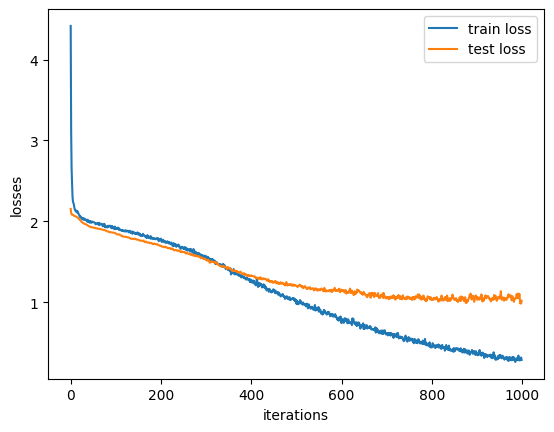

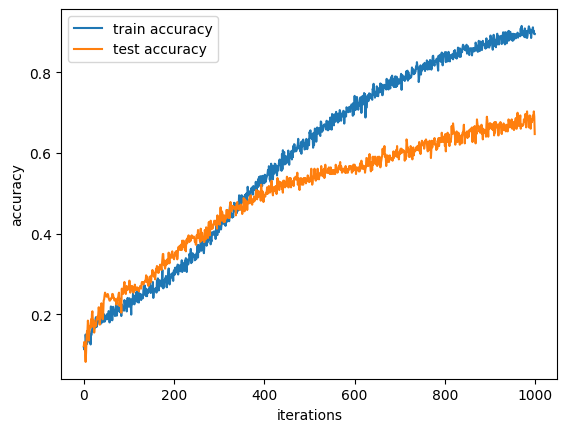

In [23]:
plotter(history)

model.summary()
result = model.evaluate(x_test_cnn,y_test)
print(result)
     

## **Evaluation Metrics**

### ***Confusion Matrix***

<Axes: >

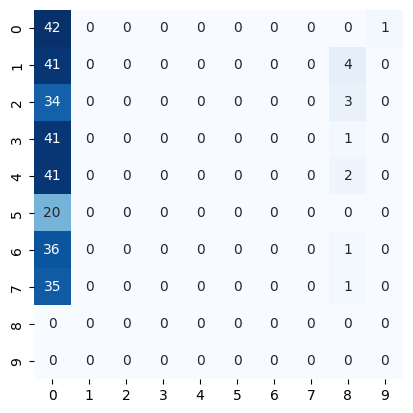

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert y_test to one-dimensional array of label indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert x_test_cnn to one-dimensional array of label indices
x_test_cnn_indices = np.argmax(x_test_cnn, axis=1)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test_indices, x_test_cnn_indices)

# Visualize confusion matrix as heatmap
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

#### Multiclass Classification Version:

10/10 [==============================] - 0s 2ms/step


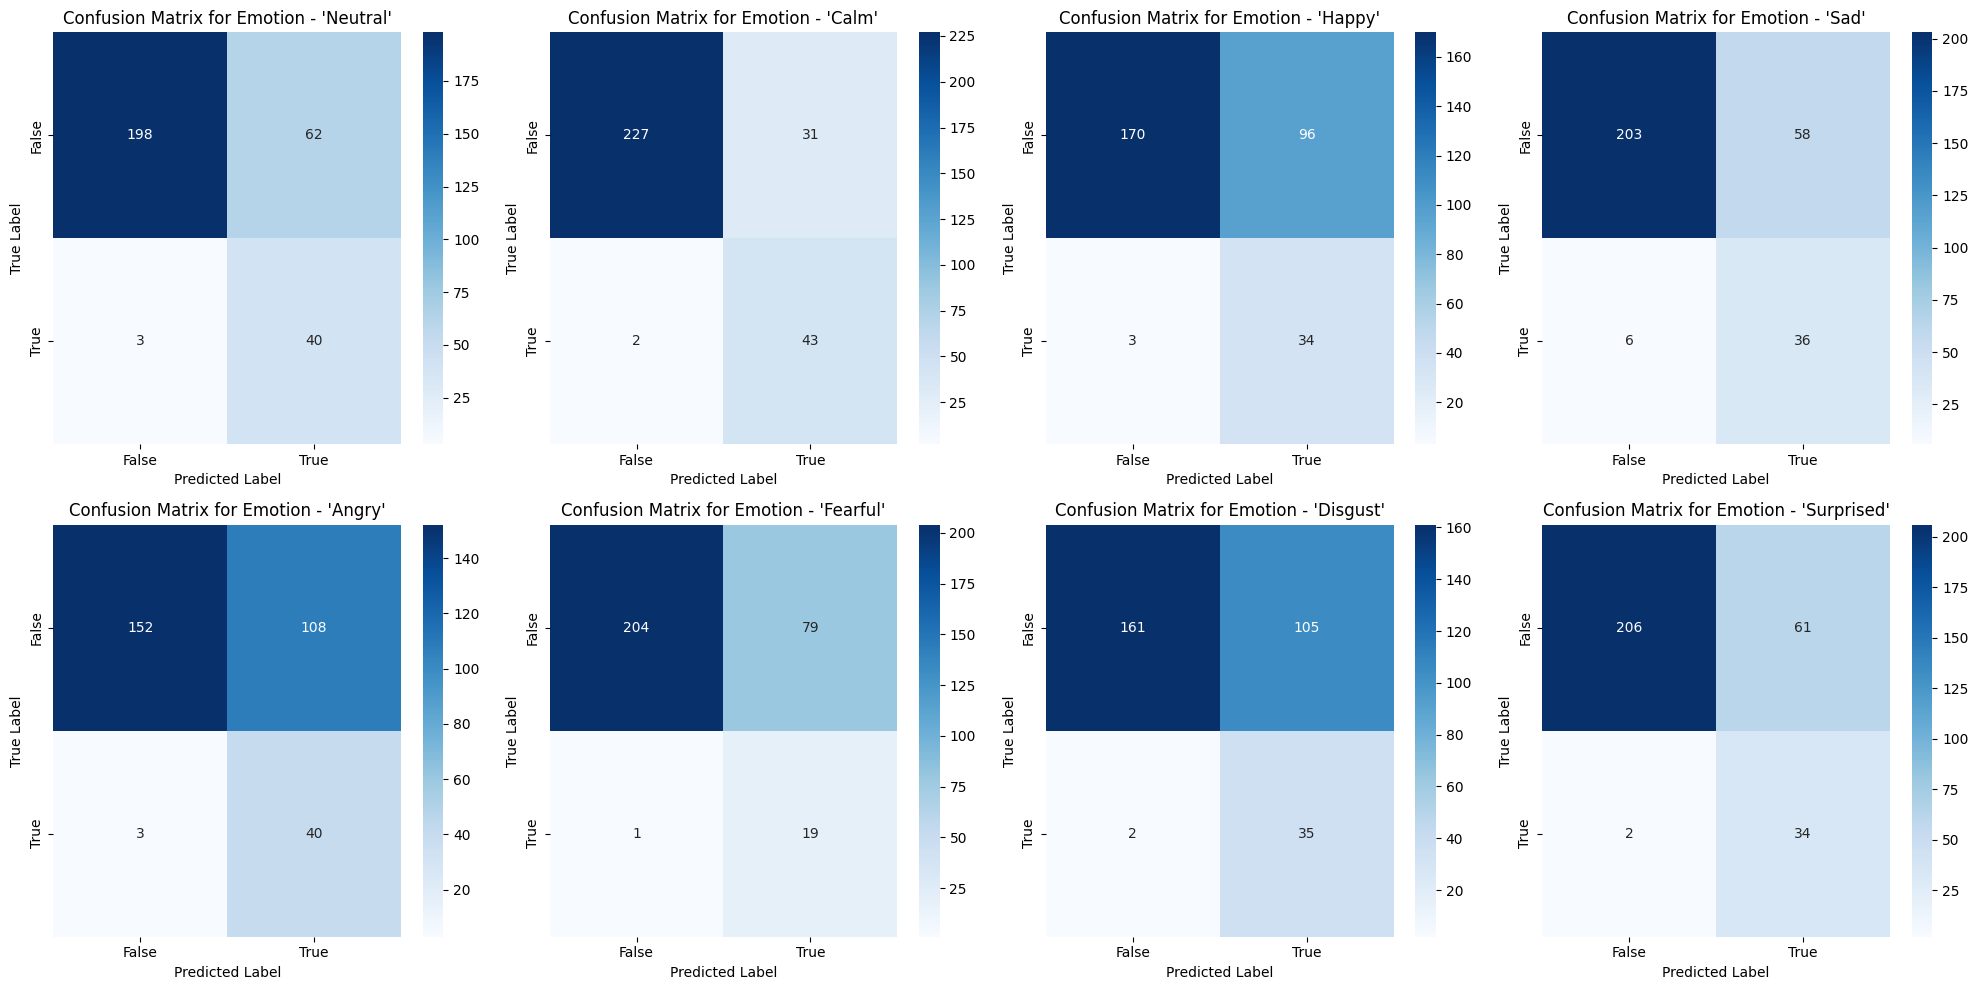

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Make predictions on x_test_cnn
y_pred = model.predict(x_test_cnn)

# Convert the predictions and ground truth labels to binary matrices
y_pred_bin = (y_pred > 0.5).astype(int)
y_test_bin = y_test.astype(int)

# Calculate the confusion matrix
conf_mat = multilabel_confusion_matrix(y_test_bin, y_pred_bin)

# Define the class names
class_names = ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]

# Plot the confusion matrix for each class
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i in range(8):
    sns.heatmap(conf_mat[i], annot=True, cmap="Blues", fmt="d", xticklabels=["False", "True"], yticklabels=["False", "True"], ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(f"Confusion Matrix for Emotion - '{class_names[i]}'")
    axs[i//4, i%4].set_xlabel("Predicted Label")
    axs[i//4, i%4].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [26]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.39      0.93      0.55        43
           1       0.58      0.96      0.72        45
           2       0.26      0.92      0.41        37
           3       0.38      0.86      0.53        42
           4       0.27      0.93      0.42        43
           5       0.19      0.95      0.32        20
           6       0.25      0.95      0.40        37
           7       0.36      0.94      0.52        36

   micro avg       0.32      0.93      0.47       303
   macro avg       0.34      0.93      0.48       303
weighted avg       0.35      0.93      0.50       303
 samples avg       0.34      0.93      0.49       303



### ***Precision, Recall, F1 Score***

In [29]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(x_test_cnn)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)



10/10 [==============================] - 0s 2ms/step
Precision: 0.663011914458029
Recall: 0.6501650165016502
F1 score: 0.6494166545801906


### ***Sensitivity For Different Classes***

In [28]:
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

TP = np.diag(cm)
FN = np.sum(cm, axis=1) - TP

sensitivity = TP / (TP + FN)

print("Sensitivity: ",sensitivity)

Sensitivity:  [0.6744186  0.77777778 0.75675676 0.54761905 0.51162791 0.6
 0.56756757 0.75      ]


### ***ROC-AUC Score & Curve***

#### Collective Score:

In [30]:
from sklearn.metrics import roc_auc_score

# make predictions on test set
y_pred = model.predict(x_test_cnn)

# calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred, average='macro')

print('ROC-AUC score:', roc_auc)


10/10 [==============================] - 0s 2ms/step
ROC-AUC score: 0.9058550816230396


#### Graphical Representation of That:

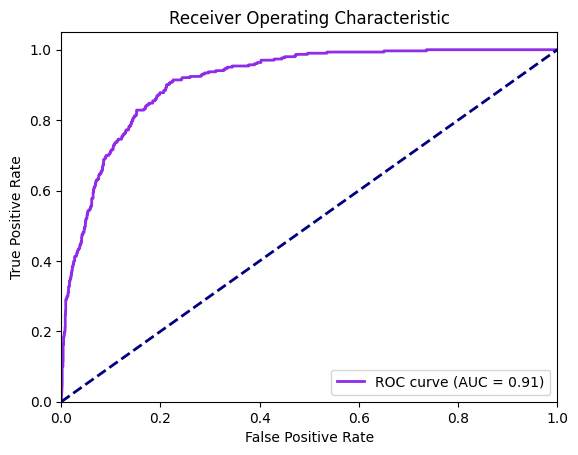

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='#902ce8', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### Multiclass Version [Different ROCs for Different Classes]:

In [36]:
n_classes = y_test.shape[1]
roc_auc_scores = []
for i in range(n_classes):
    roc_auc_scores.append(roc_auc_score(y_test[:, i], y_pred[:, i]))

In [37]:
roc_auc_scores

[0.9440966010733451,
 0.9702842377260982,
 0.9097744360902256,
 0.9067688378033205,
 0.8614490161001789,
 0.862720848056537,
 0.8423084738874212,
 0.949438202247191]

#### Plotting That:

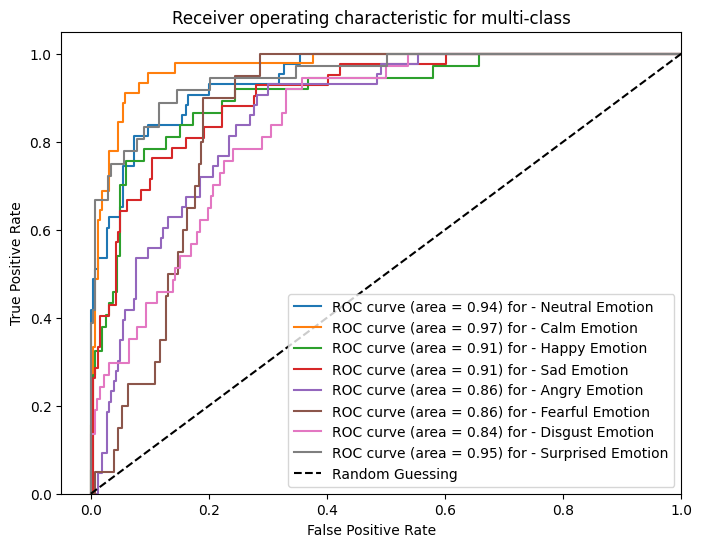

In [42]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

emotions = ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]
# Plot ROC curves
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for - %s Emotion' % (roc_auc[i], emotions[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()